In [259]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [260]:
data_path = '../../data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

In [261]:
train = train_df.copy()
year = year_data.copy()
writer = writer_data.copy()
title = title_data.copy()
genre = genre_data.copy()
director = director_data.copy()

# 모르겠는 부분

In [262]:
train['user'].value_counts()

8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: user, Length: 31360, dtype: int64

<AxesSubplot: >

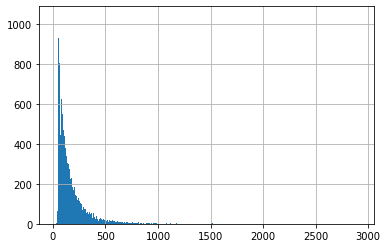

In [21]:
train['user'].value_counts().hist(bins=1000) # <- 이해안감

# 감독이 14명인 아이템에 대해 진짜 14명인지 확인
-> 21명이었다

In [5]:
director['item'].value_counts()[:5]

50912    14
1282     10
27002     8
7502      7
71823     7
Name: item, dtype: int64

In [6]:
title_data[title_data['item'] == 50912]

,item,title
3020,50912,"Paris, I Love You (Paris, je t'aime) (2006)"


In [22]:
#director[director['item'] == 50912]

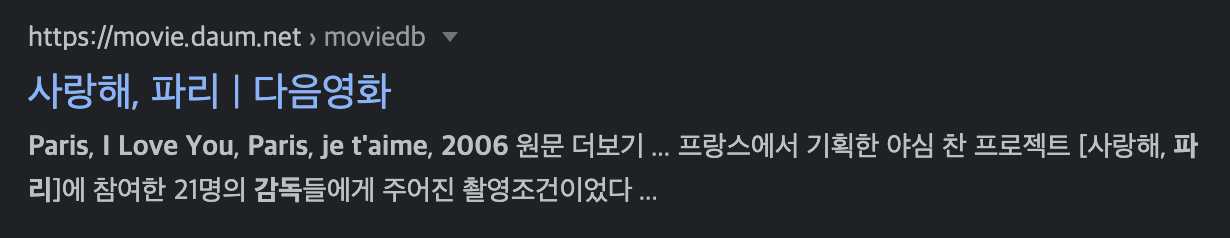

# Raw 데이터 중복 및 결측값 확인

In [9]:
import sys
sys.executable

'/opt/conda/bin/python'

In [12]:
!pip install missingno

  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)


In [13]:
import missingno as msno

## 전체 결측값 확인

In [15]:
director.head(3)

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005


In [16]:
# test_df = train.merge(users, how="left", on='user_id')

In [17]:
df = train.merge(year, how="left", on="item")
df = df.merge(writer, how="left", on="item")
df = df.merge(title, how="left", on="item")
df = df.merge(genre, how="left", on="item")
df = df.merge(director, how="left", on="item")

In [18]:
df.head(3)

,user,item,time,year,writer,title,genre,director
0,11,4643,1230782529,2001.0,nm0099541,Planet of the Apes (2001),Action,nm0000318
1,11,4643,1230782529,2001.0,nm0099541,Planet of the Apes (2001),Adventure,nm0000318
2,11,4643,1230782529,2001.0,nm0099541,Planet of the Apes (2001),Drama,nm0000318


In [28]:
df.isnull().sum()

user              0
item              0
time              0
year           6920
writer       695889
title             0
genre             0
director    1184231
dtype: int64

<AxesSubplot: >

/opt/conda/lib/python3.8/site-packages/matplotlib/image.py:180: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


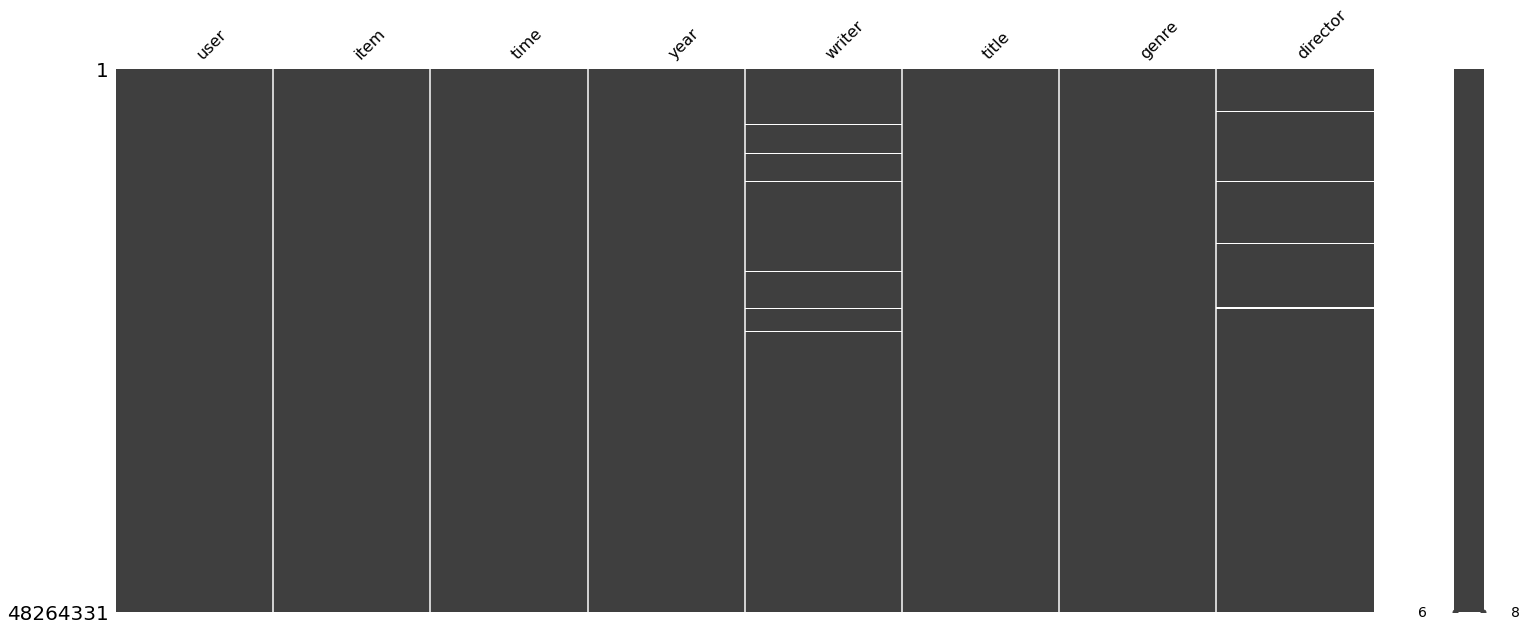

In [19]:
%matplotlib inline
msno.matrix(df)

## year의 중복 및 결측값 확인
배경 : 총 아이템은 6807개인데, year의 개수는 6799개이다.</br>
결과 : train의 아이템 중 year 정보가 없는 아이템은 8개이다.

In [33]:
len(set(train['item']) - set(year['item']))

8

In [34]:
set(train['item']) - set(year['item'])

{3310, 6987, 6988, 7065, 7243, 8511, 32898, 119145}

## writer의 중복 값 및 결측값 확인
배경 : 총 아이템은 6807개인데, writer의 행길이는 11306행이다.</br>
      item unique수 : 5648, writer unique수 : 2989</br>
결과 : (결측)train item 중 작가 정보가 없는 아이템은 1159개이다. (전체 6807 중 1159 : 17.03%)</br>
      (중복)2명 이상의 작가가 기여한 아이템은 2988개(43.89%)이고, 누군가와 함께 써본 작가의 수는 2193명이다.(73.37%)</br>

In [35]:
len(set(train['item']) - set(writer['item']))

1159

In [38]:
sum(writer[['item']].duplicated())

5658

In [77]:
writer[writer[['item']].duplicated()==True].head(3)

,item,writer
223,93563,nm0000118
231,3632,nm0000122
271,1258,nm0000175


In [ ]:
# writer[writer['item']==93563]

In [74]:
writer[writer[['item']].duplicated()==True].nunique()

item      2988
writer    2193
dtype: int64

In [129]:
#작가가 여러명인 아이템 set
len(set(writer[writer[['item']].duplicated()==True]['item']))
dup_writer_item = set(writer[writer[['item']].duplicated()==True]['item'])

In [98]:
#작가가 여러명인 아이템 df
dup_writer_df = []

for item in dup_writer_item:
    dup_writer_df.append(writer.loc[writer['item'] == item])
dup_writer_df = pd.concat(dup_writer_df)

In [111]:
# 한 아이템에 최대 24명의 작가가 기여했다.
dup_writer_df['item'].value_counts().reset_index(drop=True)

0       24
1       23
2       21
3       21
4       19
        ..
2983     2
2984     2
2985     2
2986     2
2987     2
Name: item, Length: 2988, dtype: int64

<AxesSubplot: >

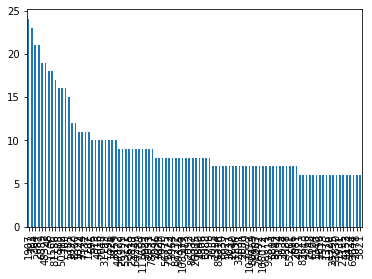

In [114]:
# 기여한 작가수 상위 100 아이템
dup_writer_df['item'].value_counts()[:100].plot(kind="bar")

In [125]:
dup_writer_df['item'].value_counts().to_frame().describe()

,item
count,2988.000000
mean,2.893574
std,1.683548
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,24.000000


## 시간의 흐름에 따른 interaction 개수

In [174]:
import time

train_time = train.copy()
train_time['log_year'] = train_time['time'].apply(lambda x : time.strftime('%Y', time.localtime(x)))
train_time['month'] = train_time['time'].apply(lambda x : time.strftime('%m', time.localtime(x)))

train_time['log_year'] = train_time['log_year'].astype('int')
train_time['month'] = train_time['month'].astype('int')
train_time.sample(3)

,user,item,time,log_year,month
2029814,53853,8910,1246933666,2009,7
2855976,76319,48394,1247015444,2009,7
3024170,80671,4008,1119216662,2005,6


In [175]:
train_time['log_year'].unique()

array([2009, 2011, 2008, 2007, 2010, 2015, 2006, 2012, 2014, 2005, 2013])

<AxesSubplot: xlabel='log_year'>

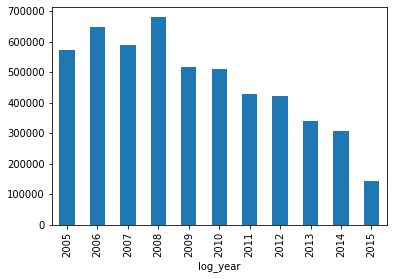

In [176]:
#year별로 평가 개수 히스토그램 그래프로 나타내기
train_time.groupby(train_time['log_year'])['item'].count().plot(kind="bar")

In [177]:
train_time.groupby(train_time['log_year'])['item'].count()

log_year
2005    572894
2006    647240
2007    589945
2008    679269
2009    517366
2010    510385
2011    427103
2012    421942
2013    338109
2014    308281
2015    141937
Name: item, dtype: int64

<AxesSubplot: >

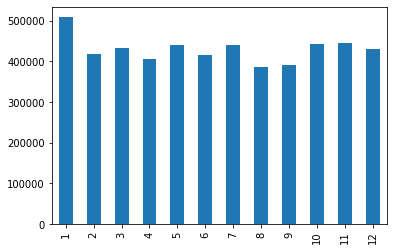

In [178]:
# month별로 평가 개수 히스토그램 그래프로 나타내기
train_time['month'].value_counts().sort_index().plot(kind="bar")

In [179]:
train_time['month'].value_counts().sort_index()

1     508889
2     417357
3     432249
4     406257
5     439160
6     414722
7     440935
8     386369
9     390955
10    442310
11    444009
12    431259
Name: month, dtype: int64

<AxesSubplot: xlabel='log_year,month'>

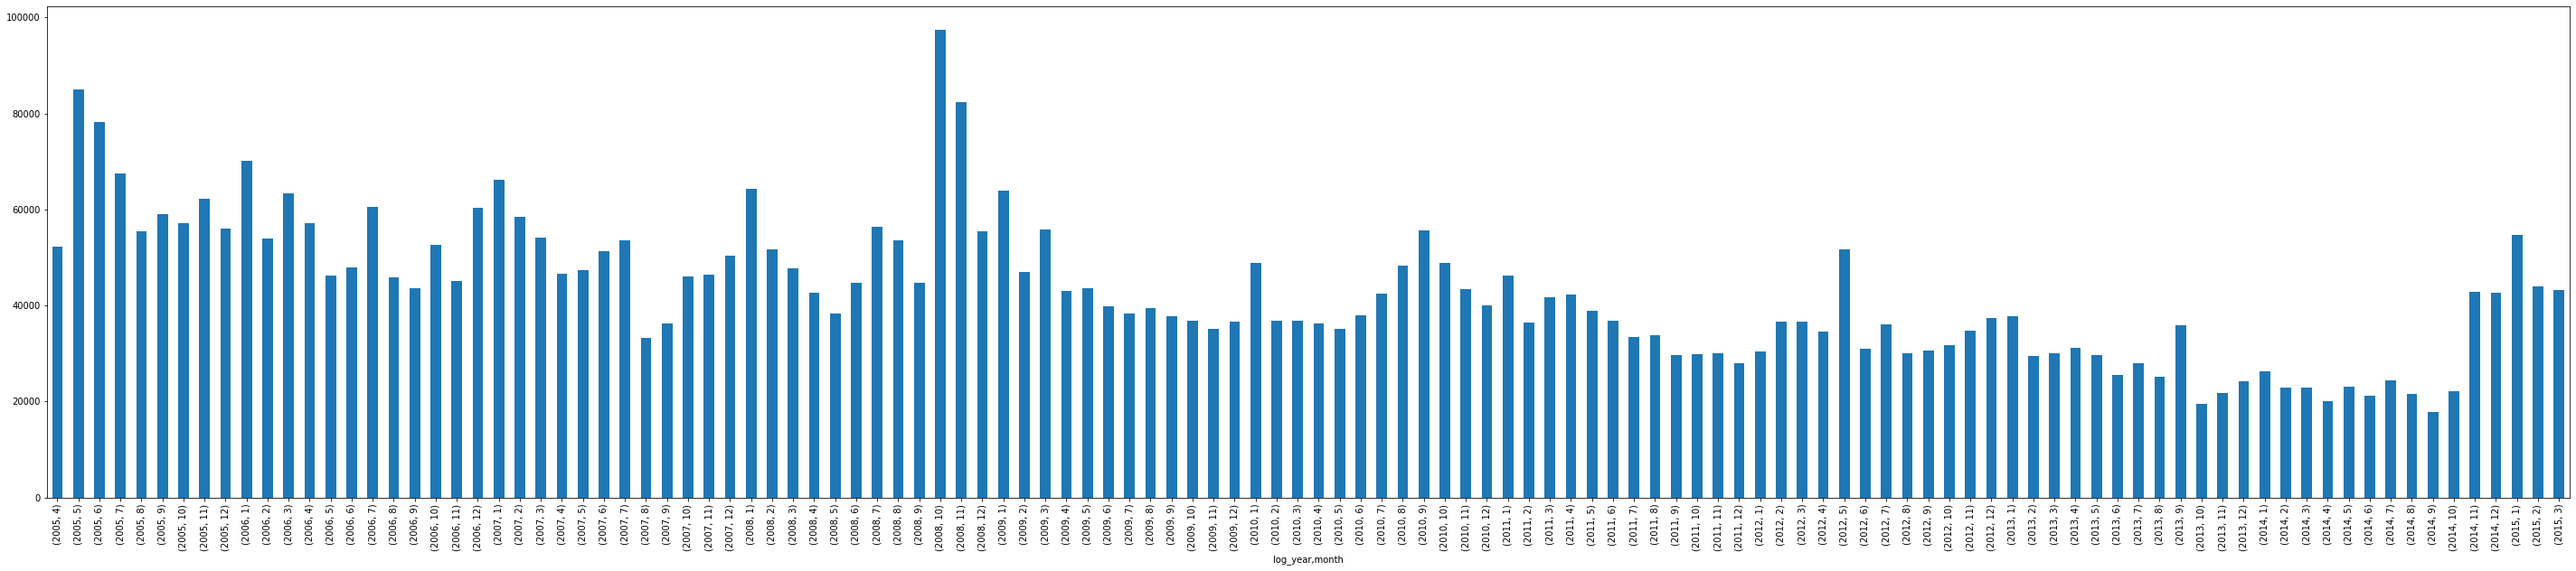

In [180]:
# month 흐름별로 평가 개수 히스토그램 그래프로 나타내기
tr_gb = train_time.groupby(['log_year','month'])['item'].count()
plt.figure(figsize=(50,10))
tr_gb.plot(kind = 'bar')

## 각 영화개봉일에 따른 평점 개수
배경 : interaction은 2005년부터 기록되었다. -> 2005년 이후 영화들의 평점이 더 많지않을까?</br>
결과 : 1993년 이후부터 interaction 수가 많다.

In [169]:
train = train_df.copy()
train_year = train.merge(year, how='left', on='item')

In [170]:
# year의 nan값 확인
train_year.isna().sum()

user       0
item       0
time       0
year    1832
dtype: int64

In [173]:
# year 정보가 없는 8개 아이템은 빼주었다.
train_year = train_year.dropna()

<AxesSubplot: xlabel='year'>

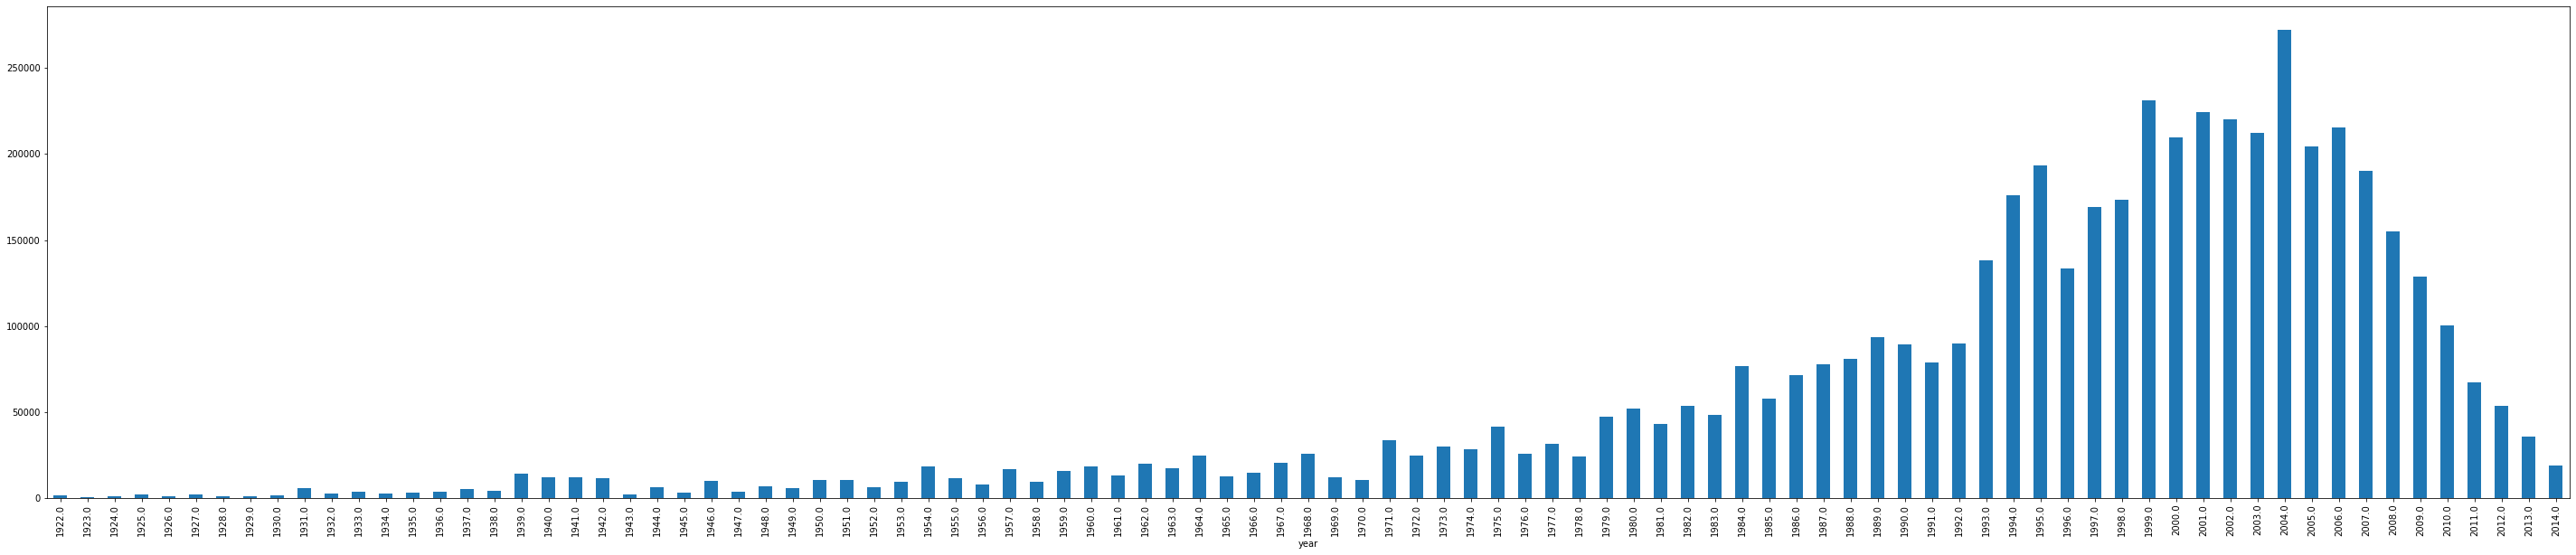

In [181]:
tr_gb = train_year.groupby(['year'])['item'].count()
plt.figure(figsize=(50,10))
tr_gb.plot(kind = 'bar')

In [209]:
train_year['year'].value_counts()

2004.0    272242
1999.0    231320
2001.0    224178
2002.0    220123
2006.0    215314
           ...  
1928.0      1208
1929.0      1063
1926.0       910
1924.0       781
1923.0       352
Name: year, Length: 93, dtype: int64

In [206]:
# 하위 개봉년도의 평점 개수 -> 최하위 3개 제외 최소 1000개이상의 interaction
low_interaction_year = train_year['year'].value_counts().index[-10:]

low_year_df = []
for year in low_interaction_year:
    low_year_df.append(train_year.loc[train_year['year'] == year])
    
low_year_df = pd.concat(low_year_df)

In [213]:
low_year_df['year'].value_counts()

1927.0    2223
1925.0    2016
1943.0    1793
1930.0    1367
1922.0    1229
1928.0    1208
1929.0    1063
1926.0     910
1924.0     781
1923.0     352
Name: year, dtype: int64

## 연도별 interaction 수 / item 수 비율

In [229]:
# 1923년도에 나온 영화는 2개이다. -> 그래서 interaction 수가 적은게 아닐까?
train_year[train_year['year']==1923].nunique()

user        298
item          2
time        352
year          1
year_cnt      1
dtype: int64

In [230]:
tr_gb = train_year.groupby(['year'])['item'].count()
train_year['year_interaction'] = train_year['year'].map(train_year['year'].value_counts())
train_year['item_cnt'] = train_year['year'].map(train_year.groupby(['year'])['item'].nunique())

In [231]:
#연도별 item 개수
#train_year.groupby(['year'])['item'].nunique()

In [233]:
train_year['year_intr_item_ratio'] = train_year['year_interaction'] / train_year['item_cnt']

In [256]:
train_year

,user,item,time,year,year_cnt,year_interaction,item_cnt,year_intr_item_ratio
0,11,4643,1230782529,2001.0,224178,224178,222,1009.810811
1,11,170,1230782534,1995.0,193353,193353,158,1223.753165
2,11,531,1230782539,1993.0,138197,138197,132,1046.946970
3,11,616,1230782542,1970.0,10602,10602,33,321.272727
4,11,2140,1230782563,1982.0,53376,53376,63,847.238095
...,...,...,...,...,...,...,...,...
5154466,138493,44022,1260209449,2006.0,215314,215314,284,758.147887
5154467,138493,4958,1260209482,2001.0,224178,224178,222,1009.810811
5154468,138493,68319,1260209720,2009.0,128839,128839,247,521.615385
5154469,138493,40819,1260209726,2005.0,204326,204326,260,785.869231


In [267]:
train_year.describe()

,user,item,time,year,year_cnt,year_interaction,item_cnt,year_intr_item_ratio
count,5.152639e+06,5.152639e+06,5.152639e+06,5.152639e+06,5.152639e+06,5.152639e+06,5.152639e+06,5.152639e+06
mean,6.875150e+04,1.716981e+04,1.248014e+09,1.993837e+03,1.448922e+05,1.448922e+05,1.654185e+02,8.546837e+02
std,3.993436e+04,2.633641e+04,8.967950e+07,1.527865e+01,7.796078e+04,7.796078e+04,8.145734e+01,2.446417e+02
min,1.100000e+01,1.000000e+00,1.113221e+09,1.922000e+03,3.520000e+02,3.520000e+02,2.000000e+00,1.511053e+02
25%,3.419900e+04,1.304000e+03,1.170355e+09,1.989000e+03,7.642400e+04,7.642400e+04,9.500000e+01,7.022657e+02
50%,6.860500e+04,3.893000e+03,1.234650e+09,1.998000e+03,1.689680e+05,1.689680e+05,1.750000e+02,8.928302e+02
75%,1.032010e+05,2.671300e+04,1.318282e+09,2.004000e+03,2.120940e+05,2.120940e+05,2.420000e+02,1.039092e+03
max,1.384930e+05,1.191410e+05,1.427781e+09,2.014000e+03,2.722420e+05,2.722420e+05,2.840000e+02,1.274087e+03


<AxesSubplot: xlabel='year'>

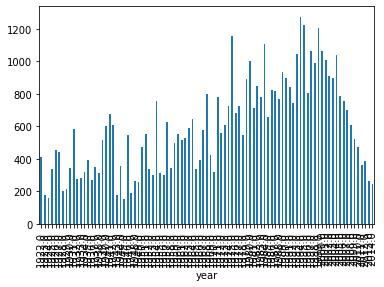

In [268]:
train_year[['year', 'year_intr_item_ratio']].groupby(['year'])['year_intr_item_ratio'].mean().plot(kind='bar')

## 각 영화별 시간 흐름(시퀀스)에 따른 변화(재평가)
-> 방법을 모르겠음

# 유저에 대해서도 분석해야해

In [ ]:
train_user = train_df.copy()

In [ ]:
train_user[train_user['user'] == 11]